In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [15]:
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D
# from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [16]:
reviews = pd.read_csv("D:\\archive_19\\Bengali Review Dataset.csv")

reviews.shape

(11807, 2)

In [17]:
reviews.head()

,Reviews,Sentiment
0,অসাধারণ নিশো বস্ আর অমি ভাইকেও।,positive
1,"""এত মোটা বাশ নিতে পারছি না বাবা """,negative
2,নাটক আসলেই অসাধারণ,positive
3,ফালতু একটা নাটক,negative
4,ধুমপান সাস্থর জন্য ক্ষতিকর।,negative


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

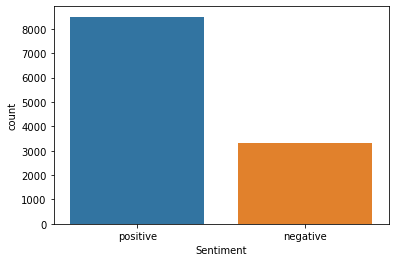

In [18]:
import seaborn as sns
sns.countplot(x = 'Sentiment', data = reviews)

In [20]:
X = reviews['Reviews'].to_numpy()

In [21]:
X

array([' অসাধারণ নিশো বস্ আর অমি ভাইকেও।',
       ' "এত মোটা বাশ নিতে পারছি না বাবা "', ' নাটক আসলেই অসাধারণ', ...,
       ' ভাই আপনাদের এত স্পন্সর দরকার তাহলে Youtube নাটক দিছেন কেন ? নাটক ভালো ছিল But দেখে শান্তি পাইলাম না',
       'এগুলো কি নাটক না কি', ' অনেক বেশি ভালো লাগল'], dtype=object)

In [22]:
y = np.array(list(map(lambda x: 1 if x == "positive" else 0, reviews['Sentiment'])))

In [23]:
y

array([1, 0, 1, ..., 1, 0, 1])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.10, random_state = 42)

In [25]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [26]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [28]:
sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [55]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, BatchNormalization, Flatten, LSTM,Conv1D,MaxPooling1D
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Flatten, Input, concatenate, Conv1D, GlobalMaxPooling1D,SimpleRNN

In [56]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)),
model.add(SimpleRNN(128,activation='relu'))
model.add (Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add (Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add (Dropout(0.3))
model.add(Dense(16,activation='relu'))
model.add (Dropout(0.3))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [57]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               18560     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_15 (Dropout)        (None, 32)               

In [59]:
training_labels_final = np.array(y_train)
testing_labels_final = np.array(y_test)

In [60]:

history = model.fit(padded, training_labels_final, epochs=60, validation_data=(testing_padded, testing_labels_final))

Epoch 1/60
333/333 [==============================] - 5s 14ms/step - loss: 2.3545 - accuracy: 0.7486 - val_loss: 0.2894 - val_accuracy: 0.8916
Epoch 2/60
333/333 [==============================] - 4s 13ms/step - loss: 0.2111 - accuracy: 0.9278 - val_loss: 0.2045 - val_accuracy: 0.9289
Epoch 3/60
333/333 [==============================] - 4s 13ms/step - loss: 0.1078 - accuracy: 0.9689 - val_loss: 0.2014 - val_accuracy: 0.9365
Epoch 4/60
333/333 [==============================] - 4s 13ms/step - loss: 0.0639 - accuracy: 0.9816 - val_loss: 0.1993 - val_accuracy: 0.9373
Epoch 5/60
333/333 [==============================] - 4s 13ms/step - loss: 25.7916 - accuracy: 0.9690 - val_loss: 0.2134 - val_accuracy: 0.9280
Epoch 6/60
333/333 [==============================] - 4s 13ms/step - loss: 53.0188 - accuracy: 0.9530 - val_loss: 0.2352 - val_accuracy: 0.9297
Epoch 7/60
333/333 [==============================] - 4s 13ms/step - loss: 0.0465 - accuracy: 0.9884 - val_loss: 108.7353 - val_accuracy: 0.

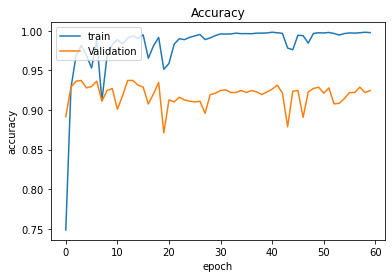

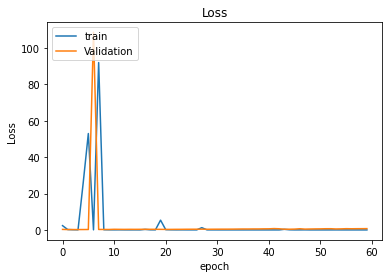

In [61]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()